# Basic Image Processing using Pillow

In [66]:
from PIL import Image, ImageChops, ImageFilter
from matplotlib import pyplot as plt


## 1. Load the image

size of the image:  (256, 256)  colour mode: RGB
size of the image:  (256, 256)  colour mode: RGB


(-0.5, 255.5, 255.5, -0.5)

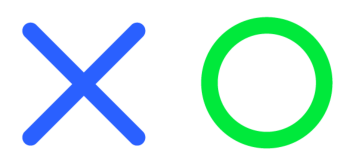

In [67]:
image_x = "img/x.png"
image_o = "img/o.png"

x = Image.open(image_x)
o = Image.open(image_o)

# Attributes of Image Objects
print('size of the image: ', x.size, ' colour mode:', x.mode)
print('size of the image: ', o.size, ' colour mode:', o.mode)

# Plot 2 images one besides the other
plt.subplot(121), plt.imshow(x)
plt.axis('off')
plt.subplot(122), plt.imshow(o)
plt.axis('off')

## 2. Multiply the images

* Merge the 2 images by multiplying them
* Order of multiplication here has no no effect

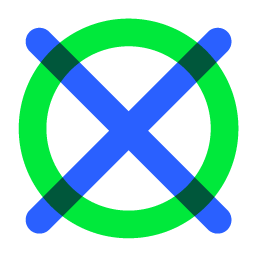

In [68]:
multiplied_images = ImageChops.multiply(o, x)
multiplied_images.save("img/multiply.png", format="png")
multiplied_images

### 2.1 Effect of other operations

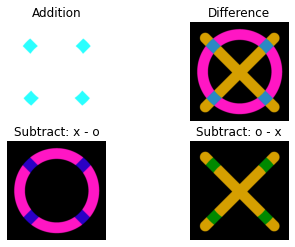

In [69]:
fig, ax = plt.subplots(2, 2)

ax[0, 0].imshow(ImageChops.add(x, o))
ax[0, 0].set_title("Addition")
ax[0, 0].axis("off")

ax[0, 1].imshow(ImageChops.difference(x, o))
ax[0, 1].set_title("Difference")
ax[0, 1].axis("off")

ax[1, 0].imshow(ImageChops.subtract(x, o))
ax[1, 0].set_title("Subtract: x - o")
ax[1, 0].axis("off")

ax[1, 1].imshow(ImageChops.subtract(o, x))
ax[1, 1].set_title("Subtract: o - x")
ax[1, 1].axis("off")

plt.savefig("img/other_operations.png", format="png", dpi=100)
plt.show()

## 3 Convert to grayscale

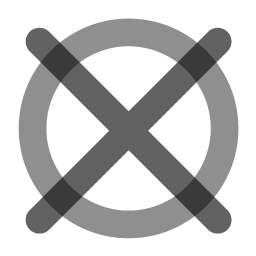

In [70]:
greyscale = multiplied_images.convert('L')
greyscale.save("img/greyscale.png", format="png")
greyscale

## 4 Convert to Black-and-White

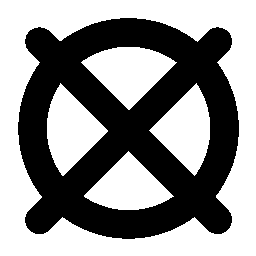

In [71]:
bnw_image = multiplied_images
pixel = bnw_image.load()

for row in range(bnw_image.size[0]):
    for col in range(bnw_image.size[1]):
        if pixel[row, col] != (255, 255, 255):
            pixel[row, col] = (0, 0, 0)

bnw_image.save("img/bnw.png", format="png")
bnw_image

## 5. Colour Inversion

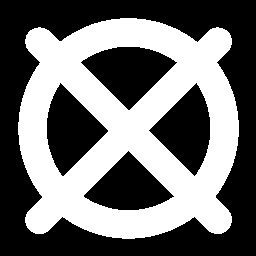

In [72]:
invert = ImageChops.invert(multiplied_images)
invert.save("img/invert.png", format="png")
invert

## 6. Rotate the image

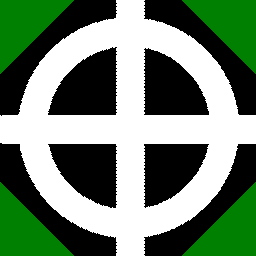

In [73]:
rotate = invert.rotate(angle=45, fillcolor="green")
rotate.save("img/rotate.png", format="png")
rotate

## 7. Blur the image

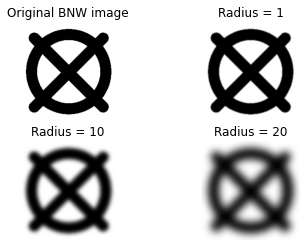

In [74]:
blur = bnw_image.filter(ImageFilter.GaussianBlur(radius=1))

fig, ax = plt.subplots(2, 2)

ax[0, 0].imshow(bnw_image)
ax[0, 0].set_title("Original BNW image")
ax[0, 0].axis("off")

ax[0, 1].imshow(bnw_image.filter(ImageFilter.GaussianBlur(radius=1)))
ax[0, 1].set_title("Radius = 1")
ax[0, 1].axis("off")

ax[1, 0].imshow(bnw_image.filter(ImageFilter.GaussianBlur(radius=5)))
ax[1, 0].set_title("Radius = 10")
ax[1, 0].axis("off")

ax[1, 1].imshow(bnw_image.filter(ImageFilter.GaussianBlur(radius=10)))
ax[1, 1].set_title("Radius = 20")
ax[1, 1].axis("off")

plt.savefig("img/blur_gaussian.png", format="png", dpi=100)
plt.show()


## 8. Edge Detection

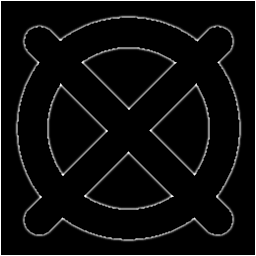

In [75]:
edge = blur.filter(ImageFilter.FIND_EDGES)
edge.save("img/edge_detect.png", format="png")
edge